In [171]:
#READ DATA

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
data = pd.read_csv(r'C:\Users\vishw.LAPTOP-9UB9J9E9\OneDrive\Desktop\Python_progs\arima_forecasting/dataset_haridwar_daily_2000_2021_final.csv')

print(data)

      Unnamed: 0       LAT       LON  YEAR  MO  DY  TEMPERATURE  Unnamed: 6  \
0              0  29.92331  78.13431  2000   1   1        14.51         NaN   
1              1  29.92331  78.13431  2000   1   2        14.29         NaN   
2              2  29.92331  78.13431  2000   1   3        13.86         NaN   
3              3  29.92331  78.13431  2000   1   4        13.90         NaN   
4              4  29.92331  78.13431  2000   1   5        13.60         NaN   
...          ...       ...       ...   ...  ..  ..          ...         ...   
7818        7818  29.92331  78.13431  2021   5  28        30.56         NaN   
7819        7819  29.92331  78.13431  2021   5  29        30.64         NaN   
7820        7820  29.92331  78.13431  2021   5  30        31.09         NaN   
7821        7821  29.92331  78.13431  2021   5  31        32.47         NaN   
7822        7822  29.92331  78.13431  2021   6   1        31.09         NaN   

           DATE  
0      2000-1-1  
1      2000-1-2

In [172]:
data2= data[['DATE','TEMPERATURE']]
print(data2)
data2.dtypes

           DATE  TEMPERATURE
0      2000-1-1        14.51
1      2000-1-2        14.29
2      2000-1-3        13.86
3      2000-1-4        13.90
4      2000-1-5        13.60
...         ...          ...
7818  2021-5-28        30.56
7819  2021-5-29        30.64
7820  2021-5-30        31.09
7821  2021-5-31        32.47
7822   2021-6-1        31.09

[7823 rows x 2 columns]


DATE            object
TEMPERATURE    float64
dtype: object

In [173]:
#OBJECT TO DATE TIME
data2['DATE']= pd.to_datetime(data['DATE'])
data2.dtypes

DATE           datetime64[ns]
TEMPERATURE           float64
dtype: object

In [174]:
#INDEXING

data2.index = data2['DATE']

In [175]:
print(data2.head())

                 DATE  TEMPERATURE
DATE                              
2000-01-01 2000-01-01        14.51
2000-01-02 2000-01-02        14.29
2000-01-03 2000-01-03        13.86
2000-01-04 2000-01-04        13.90
2000-01-05 2000-01-05        13.60


<AxesSubplot:xlabel='DATE', ylabel='TEMPERATURE'>

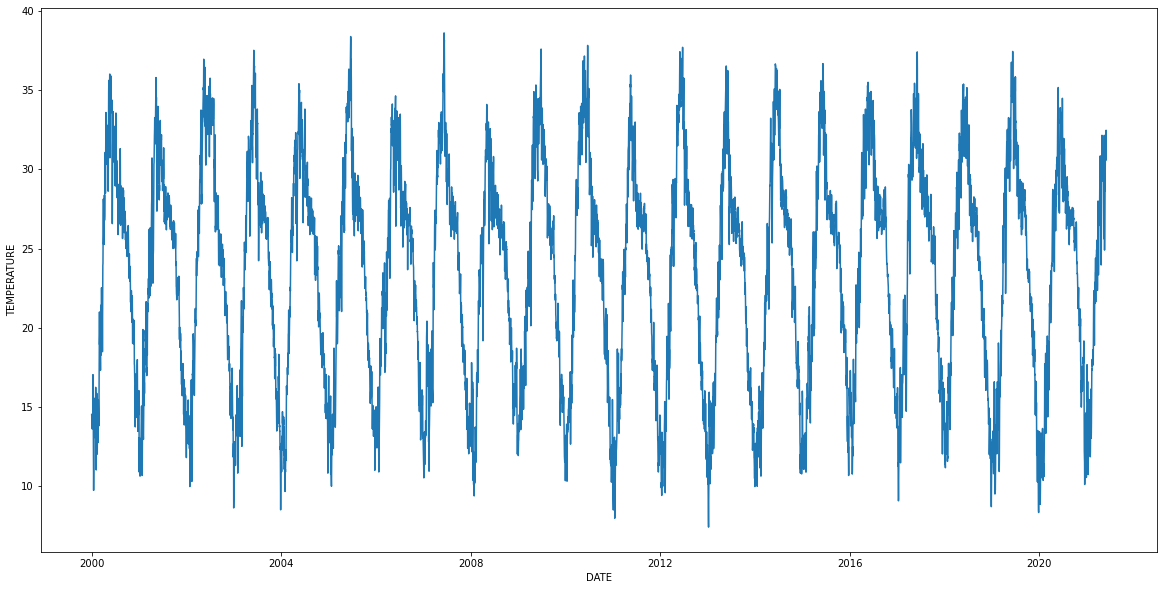

In [176]:
plt.figure(figsize=(20,10))
import seaborn as sns
sns.lineplot(x=data2.index, y=data2['TEMPERATURE'])



In [196]:
#TO CHECK DATA IS STATIONARY OR NOT

from statsmodels.tsa.stattools import adfuller
adfuller(data2['TEMPERATURE'])

(-8.537927053397683,
 9.962685949132497e-14,
 36,
 7786,
 {'1%': -3.4311901563358833,
  '5%': -2.861911287497694,
  '10%': -2.5669676317461794},
 22049.46416767419)

In [197]:
def adfuller_test(temp):
    result=adfuller(temp)
    print("1. ADF : ", result[0])
    print("2. P-value : ", result[1])
    print("3. Number of lags : " ,result[2])
    print("4. Number of observation used for ADF regression and Critical value  calculation : ", result[4])
    print("5. Critical value : ", result[5])
    for key,value in result[4].items():
        print("\t",key ," : ",value)
    if result[1]<=0.05:
        print("Strong evidence of data, i.e data is  STATIONARY")
    else:
        print("Weak evidence of data, i.e data is NOT STATIONARY") 

In [198]:
adfuller_test(data2['TEMPERATURE'])

1. ADF :  -8.537927053397683
2. P-value :  9.962685949132497e-14
3. Number of lags :  36
4. Number of observation used for ADF regression and Critical value  calculation :  {'1%': -3.4311901563358833, '5%': -2.861911287497694, '10%': -2.5669676317461794}
5. Critical value :  22049.46416767419
	 1%  :  -3.4311901563358833
	 5%  :  -2.861911287497694
	 10%  :  -2.5669676317461794
Strong evidence of data, i.e data is  STATIONARY


In [180]:
df = data2[['TEMPERATURE']]
print(df)
'''
#TO MAKE DATA STATIONARY

df = data2.copy()
df['first_diff_temp']=df['TEMPERATURE']-df['TEMPERATURE'].shift(30)
#print(df.head(40))
adfuller_test(df['first_diff_temp'].dropna())
'''

            TEMPERATURE
DATE                   
2000-01-01        14.51
2000-01-02        14.29
2000-01-03        13.86
2000-01-04        13.90
2000-01-05        13.60
...                 ...
2021-05-28        30.56
2021-05-29        30.64
2021-05-30        31.09
2021-05-31        32.47
2021-06-01        31.09

[7823 rows x 1 columns]


"\n#TO MAKE DATA STATIONARY\n\ndf = data2.copy()\ndf['first_diff_temp']=df['TEMPERATURE']-df['TEMPERATURE'].shift(30)\n#print(df.head(40))\nadfuller_test(df['first_diff_temp'].dropna())\n"

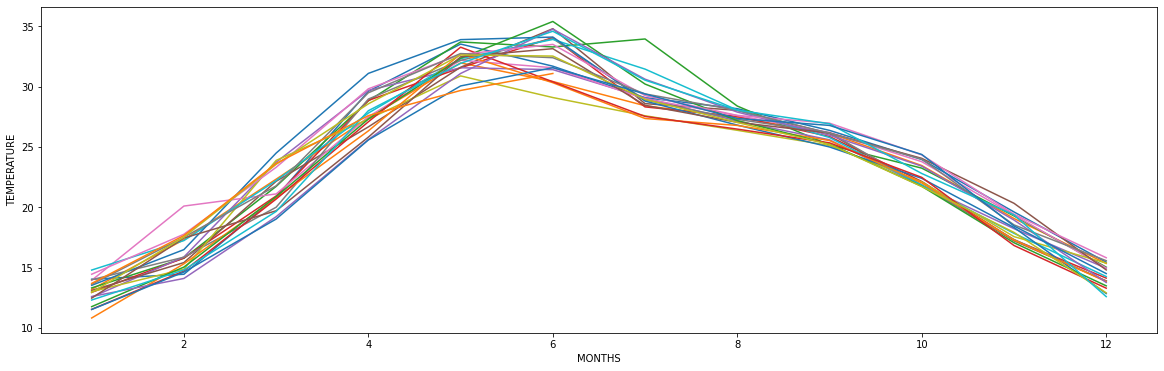

In [181]:

# ROTATE TABLE TO CHECK SEASONALITY 

pivot = data.pivot_table(values='TEMPERATURE', index=['MO'], columns='YEAR')
#print(pivot)
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('MONTHS')
plt.ylabel('TEMPERATURE')
plt.show()

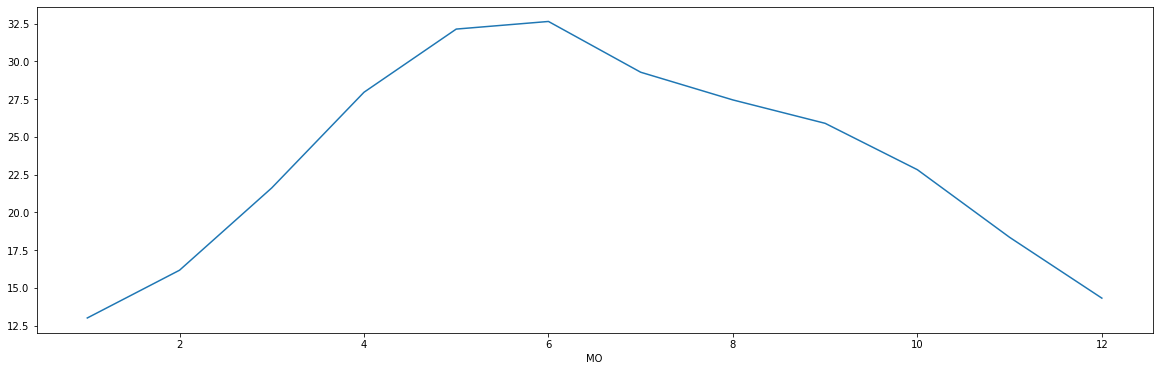

In [182]:
#TO CHECK MONTHLY SEASONALITY FACTOR IN DATA

monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.show()


In [183]:
df.head()

,TEMPERATURE
DATE,
2000-01-01,14.51
2000-01-02,14.29
2000-01-03,13.86
2000-01-04,13.90
2000-01-05,13.60


In [193]:
#AUTO-ARIMA WITH NO SEASONALITY

from pmdarima import auto_arima
stepwise_fit = auto_arima(df['TEMPERATURE'], trace=True, suppress_warnings=True)

#print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=22354.771, Time=7.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=52480.739, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22697.911, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=42969.607, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=72233.028, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=22515.273, Time=2.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=22583.757, Time=4.30 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=22330.739, Time=8.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=22331.242, Time=5.81 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=22332.908, Time=9.84 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=22320.198, Time=12.52 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=22340.193, Time=6.63 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=22331.139, Time=9.32 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=22339.968, Time=6.89 sec
 ARIMA(2,0,4)(0,0,

In [185]:
df.isna().sum()

TEMPERATURE    0
dtype: int64

In [186]:
df.shape

(7823, 1)

In [187]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

train = df.iloc[:-30]
test = df.iloc[-30:]

model = ARIMA(train['TEMPERATURE'], order=(3,0,3))
model=model.fit()
#print(model.summary())


print(train.shape, test.shape)



(7793, 1) (30, 1)


In [188]:
start = len(train)
end = len(train)+len(test)-1

pred = model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#print(pred)
pred.index=df.index[start:end+1]

In [189]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['TEMPERATURE']))
print(rmse)

1.8398568428398492


In [190]:
test['TEMPERATURE'].mean()

29.711333333333336

In [191]:

model2=ARIMA(data2['TEMPERATURE'], order=(3,0,3))
model2=model2.fit()

In [195]:
index_future_dates = pd.date_range(start='2021-06-01', end='2021-06-19')
print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+18, typ='levels').rename('ARIMA Prediction')
pred.index=index_future_dates
#print(pred)




min_temp = []
min_temp = (pred-rmse).round(2)
max_temp = []
max_temp = (pred+rmse).round(2)

res = "\n".join("{} - {} - {}".format(z, x, y) for z, x, y in zip(pred.index, min_temp, max_temp))

print(res)

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18', '2021-06-19'],
              dtype='datetime64[ns]', freq='D')
2021-06-01 00:00:00 - 28.74 - 32.42
2021-06-02 00:00:00 - 28.66 - 32.34
2021-06-03 00:00:00 - 28.6 - 32.28
2021-06-04 00:00:00 - 28.56 - 32.24
2021-06-05 00:00:00 - 28.53 - 32.21
2021-06-06 00:00:00 - 28.5 - 32.18
2021-06-07 00:00:00 - 28.48 - 32.16
2021-06-08 00:00:00 - 28.46 - 32.14
2021-06-09 00:00:00 - 28.43 - 32.11
2021-06-10 00:00:00 - 28.41 - 32.09
2021-06-11 00:00:00 - 28.38 - 32.06
2021-06-12 00:00:00 - 28.36 - 32.04
2021-06-13 00:00:00 - 28.33 - 32.01
2021-06-14 00:00:00 - 28.3 - 31.97
2021-06-15 00:00:00 - 28.26 - 31.94
2021-06-16 00:00:00 - 28.23 - 31.91
2021-06-17 00:00:00 - 28.19 - 31.87
2